In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('PHL_dataset.csv')

# 2. Define the columns to keep
cols_to_keep = [
    'P_HABITABLE',
    'P_RADIUS',
    'P_MASS',
    'P_GRAVITY',
    'P_PERIOD',
    'P_SEMI_MAJOR_AXIS',
    'P_TEMP_EQUIL',
    'S_MASS',
    'S_RADIUS',
    'S_TEMPERATURE',
    'S_LUMINOSITY'
]

# Select only the desired columns
df= df[cols_to_keep].copy()


In [ ]:
df.head()

,P_HABITABLE,P_RADIUS,P_MASS,P_GRAVITY,P_PERIOD,P_SEMI_MAJOR_AXIS,P_TEMP_EQUIL,S_MASS,S_RADIUS,S_TEMPERATURE,S_LUMINOSITY
0,0,13.90,250.00,1.293929,NaN,3.4000,NaN,0.10,NaN,NaN,NaN
1,0,2.90,16.60,1.973841,31.884000,0.1994,541.98483,1.10,1.03,5779.0,0.814704
2,0,2.11,5.10,1.145527,6.883376,0.0678,1001.11710,0.98,0.97,5698.0,1.096478
3,0,3.52,12.20,0.984633,1.921036,0.0291,1104.46820,0.89,0.82,5060.0,0.299226
4,0,2.07,4.94,1.152886,11.119907,0.0911,681.30334,0.87,0.79,5240.0,0.424620


In [ ]:
df.isnull().sum()

,0
P_HABITABLE,0
P_RADIUS,7
P_MASS,7
P_GRAVITY,7
P_PERIOD,249
P_SEMI_MAJOR_AXIS,4
P_TEMP_EQUIL,234
S_MASS,4
S_RADIUS,232
S_TEMPERATURE,219


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = 100 * df.isnull().sum() / len(df)

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print('Columns with Missing Values :')
print(missing_df.head(30))

Columns with Missing Values :
                   Missing Values  Percentage
P_PERIOD                      249    4.447223
P_TEMP_EQUIL                  234    4.179318
S_LUMINOSITY                  233    4.161457
S_RADIUS                      232    4.143597
S_TEMPERATURE                 219    3.911413
P_RADIUS                        7    0.125022
P_MASS                          7    0.125022
P_GRAVITY                       7    0.125022
P_SEMI_MAJOR_AXIS               4    0.071441
S_MASS                          4    0.071441


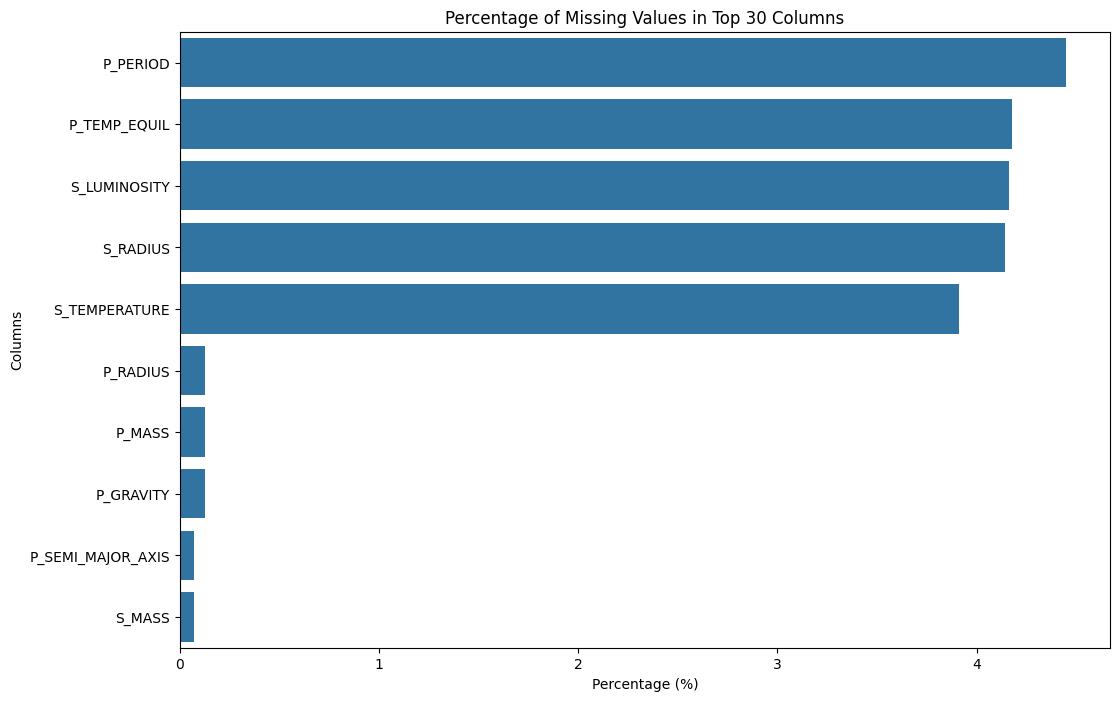

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_df['Percentage'].head(30), y=missing_df.head(30).index)
plt.title('Percentage of Missing Values in Top 30 Columns')
plt.xlabel('Percentage (%)')
plt.ylabel('Columns')
plt.show()

In [ ]:
# 3. Remove rows with more than 50% missing values
threshold = len(cols_to_keep) * 0.5
df = df.dropna(thresh=int(threshold))

In [ ]:
# 4. Impute missing values with median
median_values = df.median()
df = df.fillna(median_values)

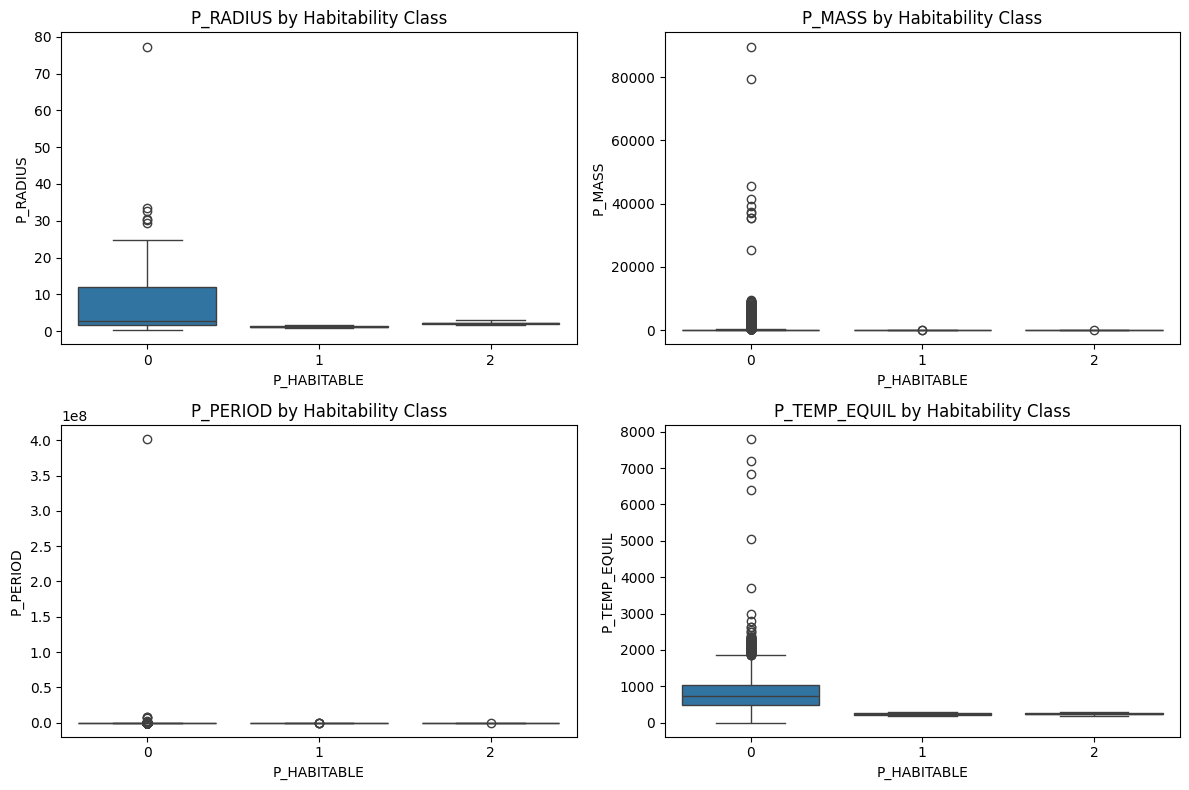

In [ ]:
features = ['P_RADIUS', 'P_MASS', 'P_PERIOD', 'P_TEMP_EQUIL']
plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='P_HABITABLE', y=col, data=df)
    plt.title(f'{col} by Habitability Class')
plt.tight_layout()
plt.show()

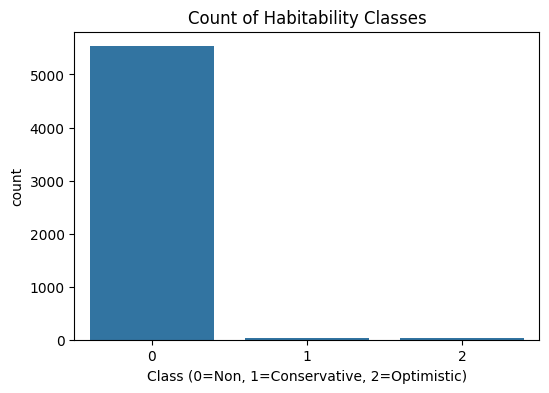

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='P_HABITABLE', data=df)
plt.title('Count of Habitability Classes')
plt.xlabel('Class (0=Non, 1=Conservative, 2=Optimistic)')
plt.show()

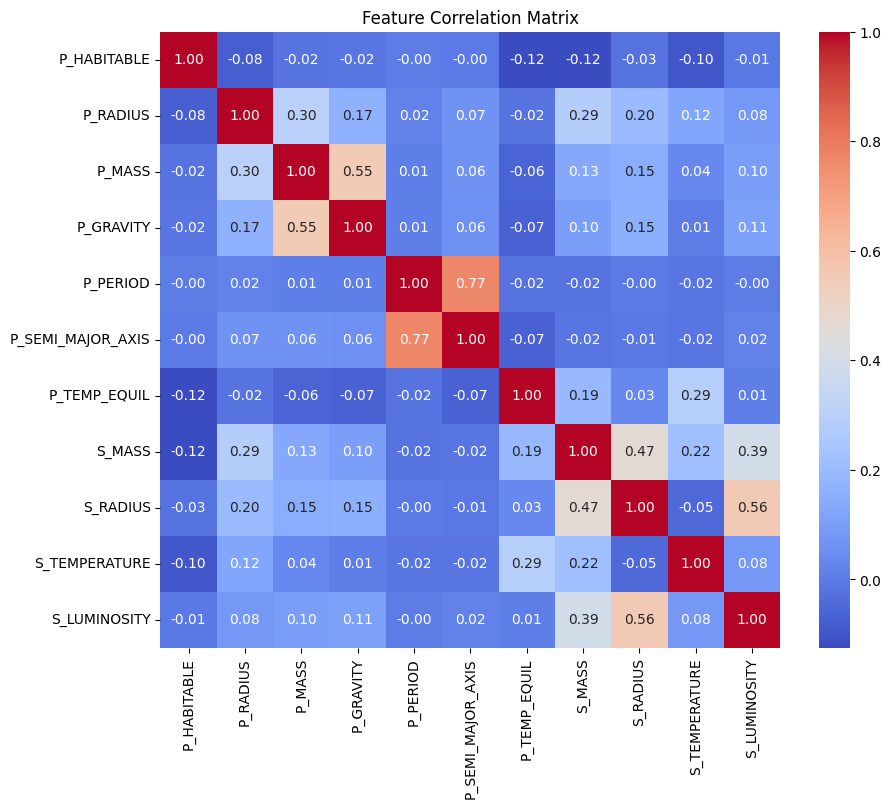

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

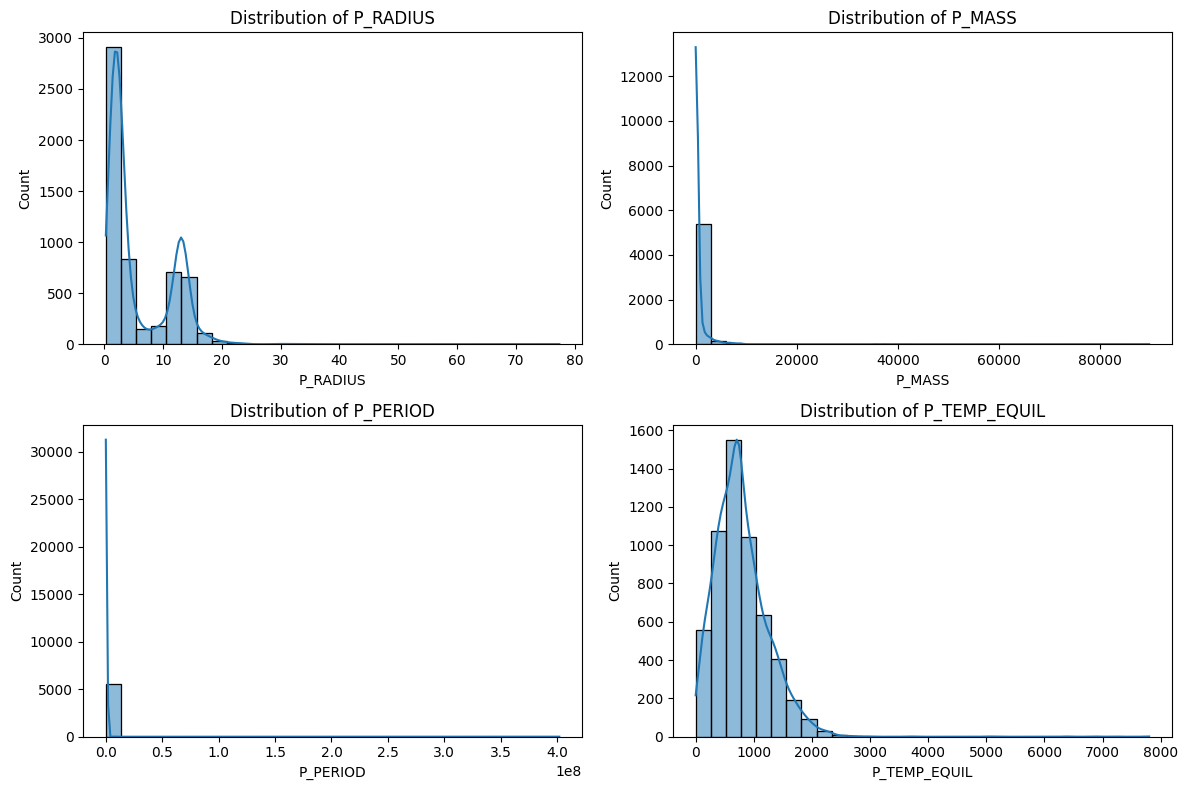

In [ ]:
features = ['P_RADIUS', 'P_MASS', 'P_PERIOD', 'P_TEMP_EQUIL']
plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

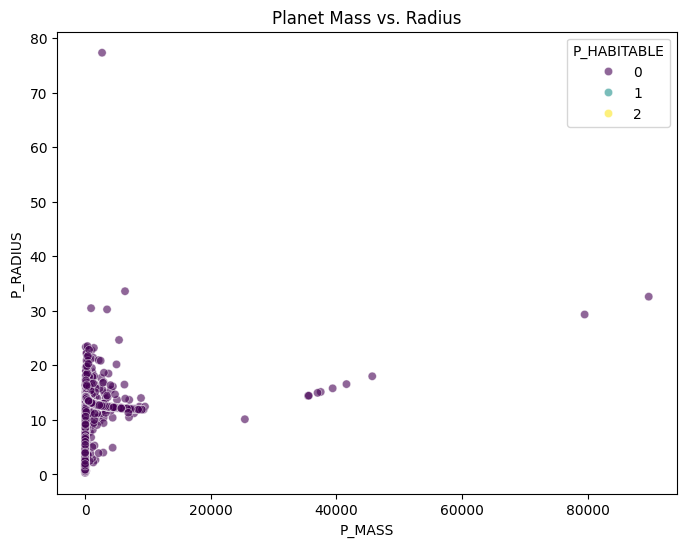

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='P_MASS', y='P_RADIUS', hue='P_HABITABLE', data=df, palette='viridis', alpha=0.6)
plt.title('Planet Mass vs. Radius')
plt.show()